In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_0 = pd.read_csv('EngineeringRanking.csv')
data2016 = pd.read_csv('EngineeringRanking_2016.csv')
data2017 = pd.read_csv('EngineeringRanking_2017.csv')
data2018 = pd.read_csv('EngineeringRanking_2018.csv')
data2019 = pd.read_csv('EngineeringRanking_2019.csv')
data2020 = pd.read_csv('EngineeringRanking_2020.csv')
data2021 = pd.read_csv('EngineeringRanking_2021.csv')

In [ ]:
data2016['year'],data2017['year'],data2018['year'],data2019['year'],data2020['year'],data2021['year']='2016','2017','2018','2019','2020','2021'
df_list = [data2016,data2017,data2018,data2019,data2020,data2021]
df = pd.concat(df_list,axis=0,ignore_index=True)

In [ ]:
df_0.head()

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,GO_17,OI_17,Perception_17,Score_16,Rank_16,TLR_16,RPC_16,GO_16,OI_16,Perception_16
0,IR-E-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,90.19,1.0,95.47,96.43,81.92,62.44,...,83.78,77.19,81.46,89.41,1,88.26,94.02,81.81,86.11,98.0
1,IR-E-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,88.96,2.0,91.76,95.82,80.97,66.39,...,77.45,71.41,77.24,82.02,4,80.27,91.62,74.72,66.17,98.0
2,IR-E-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,85.16,3.0,89.32,92.56,79.71,53.68,...,83.64,69.70,84.24,87.66,2,85.93,94.14,84.97,74.84,99.0
3,IR-E-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,83.22,4.0,86.71,83.13,89.79,55.96,...,74.29,61.35,73.59,81.07,5,66.08,93.52,85.62,70.59,98.0
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,82.03,5.0,80.51,88.59,83.01,58.46,...,88.02,74.11,73.43,83.91,3,76.23,92.68,83.95,78.05,97.0


Cleaning Data

In [ ]:
df_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Institute Id    273 non-null    object 
 1   Institute Name  273 non-null    object 
 2   City            273 non-null    object 
 3   State           273 non-null    object 
 4   Score_21        200 non-null    float64
 5   Rank_21         200 non-null    float64
 6   TLR_21          200 non-null    float64
 7   RPC_21          200 non-null    float64
 8   GO_21           200 non-null    float64
 9   OI_21           200 non-null    float64
 10  Perception_21   200 non-null    float64
 11  Score_20        200 non-null    float64
 12  Rank_20         200 non-null    float64
 13  TLR_20          200 non-null    float64
 14  RPC_20          200 non-null    float64
 15  GO_20           200 non-null    float64
 16  OI_20           200 non-null    float64
 17  Perception_20   200 non-null    flo

In [ ]:
df_0['Rank_16'].unique()

array(['1', '4', '2', '5', '3', '6', '11', '7', '12', '22', nan, '13',
       '16', '14', '50', '9', '19', '10', '8', '28', '27', '35', '20A',
       '26', '30', '18', '41', '37', '31A', '32', '20', '23', '25', '48',
       '17', '15', '65', '42', '59', '39', '21', '24', '57', '63', '33',
       '67', '38', '29', '87', '77', '84', '76', '78', '53', '52', '60',
       '61', '51', '74', '70', '34', '44', '88', '54', '86', '64', '71',
       '49', '93', '45', '56', '46', '79', '99', '72', '90', '47', '96',
       '55', '80', '62', '73'], dtype=object)

In [ ]:
# We can see that there is the letter 'A' in this column. Let's delete str 'A'.

df_0['Rank_16'] = df_0['Rank_16'].astype(str).str.rstrip('A')


# Change type 'object' to 'float'
df_0['Rank_16'] = df_0['Rank_16'].astype(float)

In [ ]:
df[219:228]

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
219,Thapar Institute of Engineering and Technology,Patiala,Punjab,56.14,20,69.77,45.75,73.11,56.55,12.01,2018
220,National Institute of Technology Surathkal,Surathkal,Karnataka,53.16,21,60.34,38.36,71.27,51.10,41.93,2018
221,Indian Institute of Engineering Science and Te...,Howrah,West Bengal,53.24,21A,67.15,45.47,61.09,40.27,32.03,2018
222,Indian Institute of Technology Ropar,Rupnagar,Punjab,52.80,22,77.84,29.53,65.29,60.61,14.73,2018
223,Indian Institute of Space Science and Technology,Thiruvananthapuram,Kerala,52.74,23,78.87,20.76,62.12,60.82,43.47,2018
224,Indian Institute of Technology Patna,Patna,Bihar,52.37,24,74.43,35.03,65.64,49.30,14.73,2018
225,National Institute of Technology Warangal,Warangal,Telangana,51.82,25,67.25,31.43,72.38,54.79,22.59,2018
226,Birla Institute of Technology,Ranchi,Jharkhand,51.12,26,71.22,36.61,59.88,51.69,16.21,2018
227,Indian Institute of Technology Mandi,Mandi,Himachal Pradesh,51.28,26A,76.90,30.48,63.07,54.64,9.96,2018


In [ ]:
df['Rank'] = df['Rank'].apply(lambda x:x if str(x).isdigit() else x[:-1])

In [ ]:
df['Rank'] = pd.to_numeric(df['Rank'])

In [ ]:
df.head()

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,"Indian Institute Of Technology, Madras",Chennai,Tamil Nadu,89.41,1,88.26,94.02,81.81,86.11,98.0,2016
1,"Indian Institute Of Technology, Bombay",Bombay,Maharashtra,87.66,2,85.93,94.14,84.97,74.84,99.0,2016
2,"Indian Institute Of Technology, Kharagpur",Kharagpur,West Bengal,83.91,3,76.23,92.68,83.95,78.05,97.0,2016
3,"Indian Institute Of Technology, Delhi",New Delhi,Delhi,82.02,4,80.27,91.62,74.72,66.17,98.0,2016
4,"Indian Institute Of Technology, Kanpur",Kanpur,Uttar Pradesh,81.07,5,66.08,93.52,85.62,70.59,98.0,2016


In [ ]:
import re
collegeName = []
college_name = data2016['Institute Name']

for college in college_name:
    college = re.sub(r'of','of',college)
    if ',' in college:
      college = ''.join(college.split(','))
      collegeName.append(college)
    else:
      collegeName.append(college)


In [ ]:
data2016['Institute Name'] = college_name

In [ ]:
df_0.columns

Index(['Institute Id', 'Institute Name', 'City', 'State', 'Score_21',
       'Rank_21', 'TLR_21', 'RPC_21', 'GO_21', 'OI_21', 'Perception_21',
       'Score_20', 'Rank_20', 'TLR_20', 'RPC_20', 'GO_20', 'OI_20',
       'Perception_20', 'Score_19', 'Rank_19', 'TLR_19', 'RPC_19', 'GO_19',
       'OI_19', 'Perception_19', 'Score_18', 'Rank_18', 'TLR_18', 'RPC_18',
       'GO_18', 'OI_18', 'Perception_18', 'Score_17', 'Rank_17', 'TLR_17',
       'RPC_17', 'GO_17', 'OI_17', 'Perception_17', 'Score_16', 'Rank_16',
       'TLR_16', 'RPC_16', 'GO_16', 'OI_16', 'Perception_16'],
      dtype='object')

In [ ]:
df2 = df_0[['Institute Name', 'State', 'Rank_16', 'Rank_17', 'Rank_18', 'Rank_19', 'Rank_20', 'Rank_21']]
df2 = df2.rename(columns={
    'Institute Name': 'InstituteName',
    'City': 'CityName',
    'State': 'StateName',
    'Rank_16': 'Rank16',
    'Rank_17': 'Rank17',
    'Rank_18': 'Rank18',
    'Rank_19': 'Rank19',
    'Rank_20': 'Rank20',
    'Rank_21': 'Rank21'
})

In [ ]:
df2

,InstituteName,StateName,Rank16,Rank17,Rank18,Rank19,Rank20,Rank21
0,Indian Institute of Technology Madras,Tamil Nadu,1.0,1.0,1,1.0,1.0,1.0
1,Indian Institute of Technology Delhi,Delhi,4.0,4.0,3,2.0,2.0,2.0
2,Indian Institute of Technology Bombay,Maharashtra,2.0,2.0,2,3.0,3.0,3.0
3,Indian Institute of Technology Kanpur,Uttar Pradesh,5.0,5.0,5,5.0,4.0,4.0
4,Indian Institute of Technology Kharagpur,West Bengal,3.0,3.0,4,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...
268,C.V. Raman College of Engineering,Odisha,NaN,92.0,NaN,NaN,NaN,NaN
269,"Maharashtra Institute of Technology, Pune",Maharashtra,NaN,94.0,NaN,NaN,NaN,NaN
270,Sri Sai Ram Engineering College,Tamil Nadu,NaN,96.0,NaN,NaN,NaN,NaN
271,ST. Joseph's College of Engineering,Tamil Nadu,NaN,97.0,NaN,NaN,NaN,NaN


In [ ]:
df1 = df_0[['Institute Name', 'State', 'Score_16', 'Score_17', 'Score_18', 'Score_19', 'Score_20', 'Score_21']]
df1 = df1.rename(columns={
    'Institute Name': 'InstituteName',
    'City': 'CityName',
    'State': 'StateName',
    'Score_16': 'Score16',
    'Score_17': 'Score17',
    'Score_18': 'Score18',
    'Score_19': 'Score19',
    'Score_20': 'Score20',
    'Score_21': 'Score21'
})


In [ ]:
df1

,InstituteName,StateName,Score16,Score17,Score18,Score19,Score20,Score21
0,Indian Institute of Technology Madras,Tamil Nadu,89.41,87.96,88.95,89.05,89.93,90.19
1,Indian Institute of Technology Delhi,Delhi,82.02,81.08,82.18,85.36,88.08,88.96
2,Indian Institute of Technology Bombay,Maharashtra,87.66,87.87,84.82,84.40,85.08,85.16
3,Indian Institute of Technology Kanpur,Uttar Pradesh,81.07,76.83,75.24,77.57,82.18,83.22
4,Indian Institute of Technology Kharagpur,West Bengal,83.91,81.93,77.78,79.41,80.56,82.03
...,...,...,...,...,...,...,...,...
268,C.V. Raman College of Engineering,Odisha,NaN,36.82,NaN,NaN,NaN,NaN
269,"Maharashtra Institute of Technology, Pune",Maharashtra,NaN,36.75,NaN,NaN,NaN,NaN
270,Sri Sai Ram Engineering College,Tamil Nadu,NaN,36.64,NaN,NaN,NaN,NaN
271,ST. Joseph's College of Engineering,Tamil Nadu,NaN,36.51,NaN,NaN,NaN,NaN


Handling Missing Data

In [ ]:
# Check for null values
print(df1.isna().sum())

InstituteName      0
StateName          0
Score16          191
Score17          173
Score18          173
Score19           73
Score20           73
Score21           73
dtype: int64


In [ ]:
# Check for null values
print(df.isna().sum())

Institute Name    0
City              0
State             0
Score             0
Rank              0
TLR               0
RPC               0
GO                0
OI                0
Perception        0
year              0
dtype: int64


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

numerical_cols = list(np.where((df1.dtypes == np.int64) | (df1.dtypes == np.float64))[0])

imp_mean.fit(df1.iloc[:,numerical_cols])

SimpleImputer()

In [ ]:
df1.iloc[:,numerical_cols] = imp_mean.transform(df1.iloc[:,numerical_cols])

In [ ]:
df1.isna().sum()

InstituteName    0
StateName        0
Score16          0
Score17          0
Score18          0
Score19          0
Score20          0
Score21          0
dtype: int64

In [ ]:
numerical_cols = list(np.where((df2.dtypes == np.int64) | (df2.dtypes == np.float64))[0])

imp_mean.fit(df2.iloc[:,numerical_cols])

SimpleImputer()

In [ ]:
df2.iloc[:,numerical_cols] = imp_mean.transform(df2.iloc[:,numerical_cols])

In [ ]:
df2.InstituteName.head(10)

0               Indian Institute of Technology Madras
1                Indian Institute of Technology Delhi
2               Indian Institute of Technology Bombay
3               Indian Institute of Technology Kanpur
4            Indian Institute of Technology Kharagpur
5              Indian Institute of Technology Roorkee
6             Indian Institute of Technology Guwahati
7            Indian Institute of Technology Hyderabad
8    National Institute of Technology Tiruchirappalli
9          National Institute of Technology Karnataka
Name: InstituteName, dtype: object

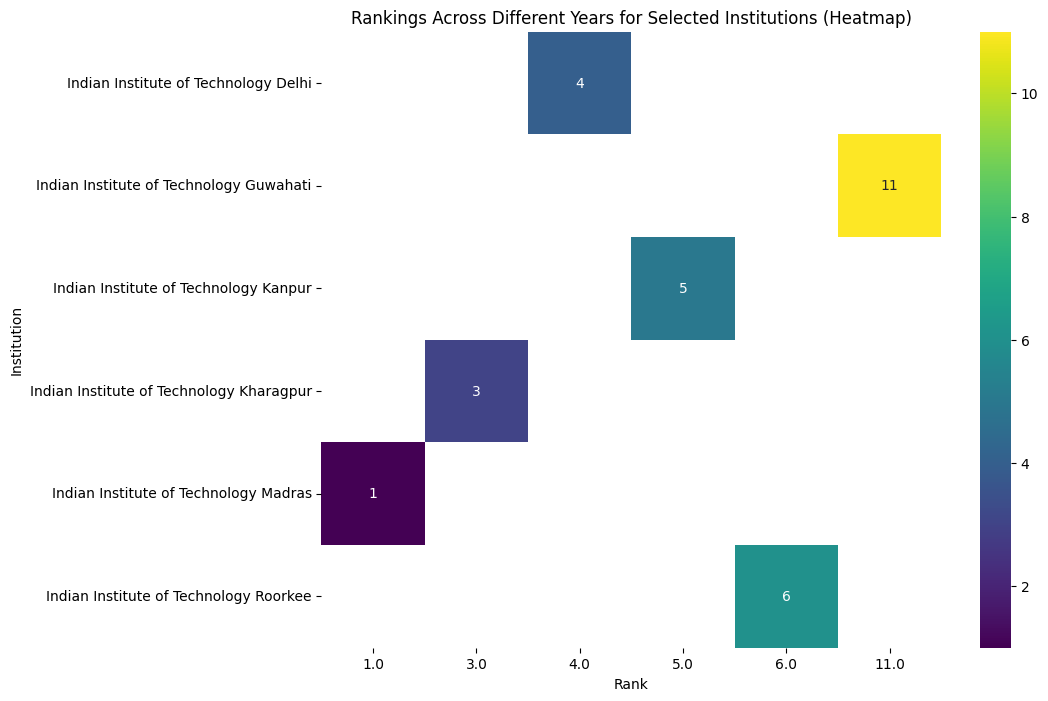

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of selected institutions
selected_institutions = ['Indian Institute of Technology Madras', 'Indian Institute of Technology Delhi', ' Indian Institute of Technology Bombay','Indian Institute of Technology Kanpur','Indian Institute of Technology Kharagpur','Indian Institute of Technology Roorkee','Indian Institute of Technology Guwahati',' Indian Institute of Technology Hyderabad','National Institute Of Technology Raipur']

# Filter the data to include only the selected institutions
selected_data = df2[df2['InstituteName'].isin(selected_institutions)]



# Create a heatmap to compare rankings of selected institutions across different years
plt.figure(figsize=(10, 8))
pivot_table = selected_data.pivot(index='InstituteName', columns='Rank16', values='Rank16')
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.xlabel('Rank')
plt.ylabel('Institution')
plt.title('Rankings Across Different Years for Selected Institutions (Heatmap)')
plt.show()


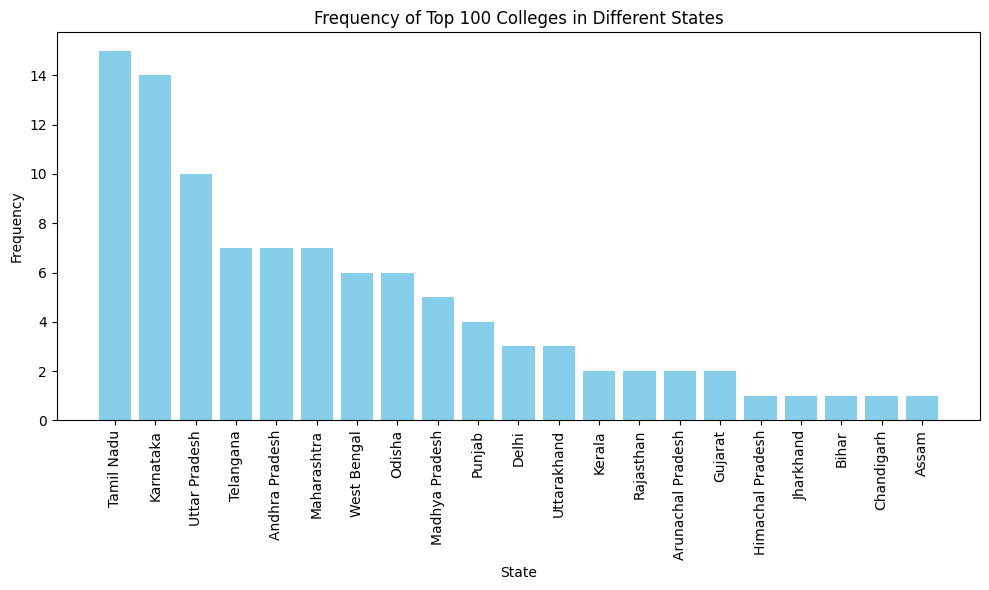

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort the DataFrame by rank in ascending order
df2_sorted = df2.sort_values(by='Rank16')

# Select the top 100 colleges
top_100_colleges = df2_sorted.head(100)

# Group the colleges by state and count the number of colleges in each state
state_counts = top_100_colleges['StateName'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Frequency of Top 100 Colleges in Different States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Tamil Nadu Has Highest Number of Colleges in top 100
the inference which we can draw is  
**Quality of Education**;
**Academic Excellence**;
**Investment in Education**;
**Student Aspirations**;
**Government Policies**;
**Strong Curriculum**;


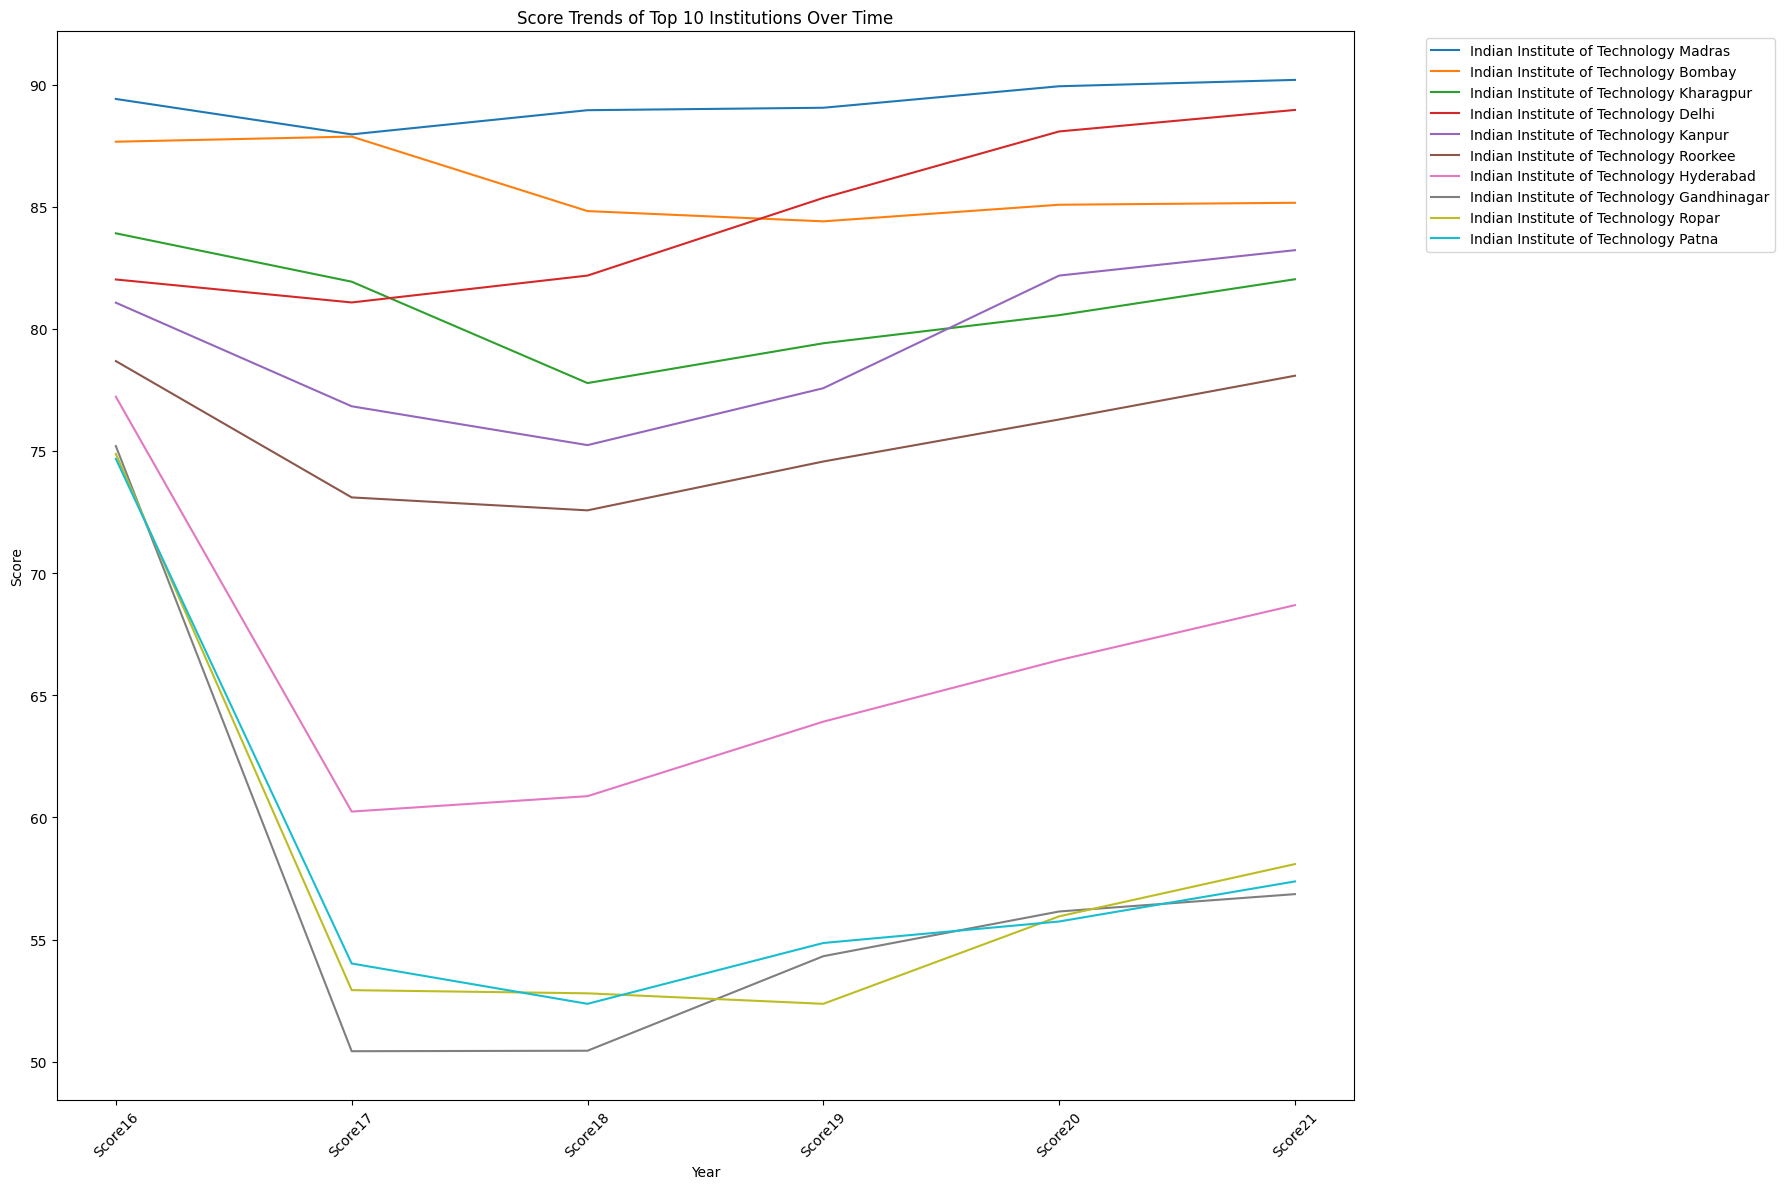

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset


plt.figure(figsize=(18, 12))

# Sort the DataFrame by 'Score16' in descending order to get the top institutions
df_sorted = df1.sort_values(by='Score16', ascending=False)

# Select the top 10 institutions
top_10 = df_sorted.head(10)

# Extract the scores for each year (adjust column names if needed)
years = ['Score16', 'Score17', 'Score18', 'Score19', 'Score20', 'Score21']

# Create a line chart to visualize score trends
for institution in top_10['InstituteName']:
    scores = top_10[top_10['InstituteName'] == institution][years].values[0]
    plt.plot(years, scores, label=institution)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Score Trends of Top 10 Institutions Over Time')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df[219:228]

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
219,Thapar Institute of Engineering and Technology,Patiala,Punjab,56.14,20,69.77,45.75,73.11,56.55,12.01,2018
220,National Institute of Technology Surathkal,Surathkal,Karnataka,53.16,21,60.34,38.36,71.27,51.10,41.93,2018
221,Indian Institute of Engineering Science and Te...,Howrah,West Bengal,53.24,21,67.15,45.47,61.09,40.27,32.03,2018
222,Indian Institute of Technology Ropar,Rupnagar,Punjab,52.80,22,77.84,29.53,65.29,60.61,14.73,2018
223,Indian Institute of Space Science and Technology,Thiruvananthapuram,Kerala,52.74,23,78.87,20.76,62.12,60.82,43.47,2018
224,Indian Institute of Technology Patna,Patna,Bihar,52.37,24,74.43,35.03,65.64,49.30,14.73,2018
225,National Institute of Technology Warangal,Warangal,Telangana,51.82,25,67.25,31.43,72.38,54.79,22.59,2018
226,Birla Institute of Technology,Ranchi,Jharkhand,51.12,26,71.22,36.61,59.88,51.69,16.21,2018
227,Indian Institute of Technology Mandi,Mandi,Himachal Pradesh,51.28,26,76.90,30.48,63.07,54.64,9.96,2018


In [ ]:
df['Rank'] = df['Rank'].apply(lambda x:x if str(x).isdigit() else x[:-1])

In [ ]:
df['Rank'] = pd.to_numeric(df['Rank'])

In [ ]:
df.head()

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,"Indian Institute Of Technology, Madras",Chennai,Tamil Nadu,89.41,1,88.26,94.02,81.81,86.11,98.0,2016
1,"Indian Institute Of Technology, Bombay",Bombay,Maharashtra,87.66,2,85.93,94.14,84.97,74.84,99.0,2016
2,"Indian Institute Of Technology, Kharagpur",Kharagpur,West Bengal,83.91,3,76.23,92.68,83.95,78.05,97.0,2016
3,"Indian Institute Of Technology, Delhi",New Delhi,Delhi,82.02,4,80.27,91.62,74.72,66.17,98.0,2016
4,"Indian Institute Of Technology, Kanpur",Kanpur,Uttar Pradesh,81.07,5,66.08,93.52,85.62,70.59,98.0,2016


Measure Of the Central Tendency

In [ ]:
colMeans = df.drop('Rank',axis=1).mean(axis=0,numeric_only=True)
print(colMeans)

Score         50.732358
TLR           62.268800
RPC           35.998117
GO            64.450483
OI            57.186250
Perception    28.083200
dtype: float64



the mean shows that the Graduation Outcome(average) is 64.4% uptil 2021 whereas the avg Graduation rate As per the latest 2011 Census, about 8.15% (98.615 million) of Indians are graduates


Distribution Type

In [ ]:
# using Visualization methods and Ks-test
# H0: Follows A normal distribution
# H1:Dosen't Follow a normal distribution

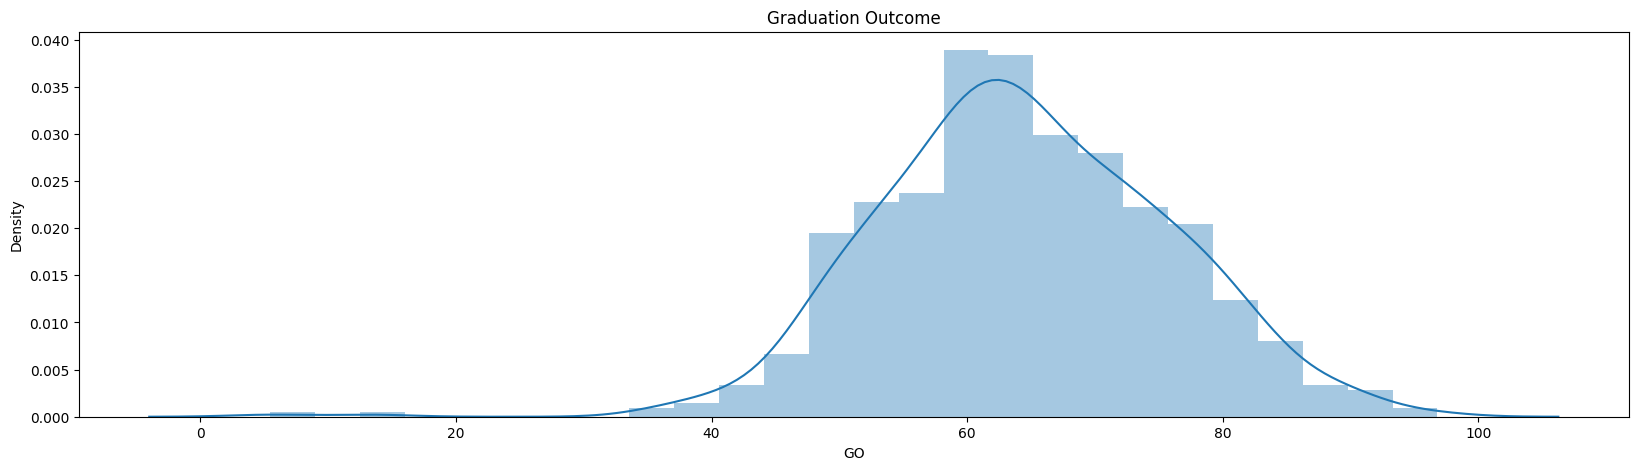

In [ ]:
import seaborn as sns

fig,a = plt.subplots(1,1,figsize=(20,5))

sns.distplot(df['GO'],hist=True,kde = True)
plt.title('Graduation Outcome')
plt.show()

This is SomeWhat right Skewed Data

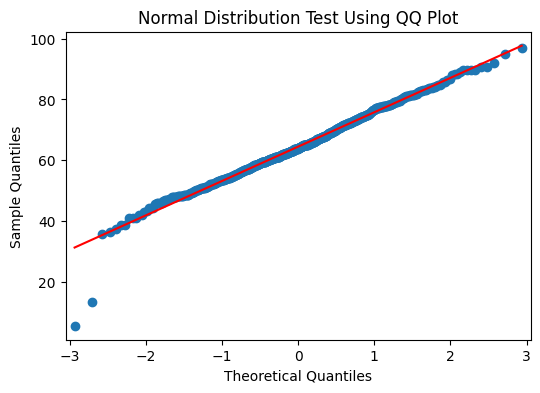

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, and 'GO' is the column you want to create a QQ plot for
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(df['GO'], line='s', ax=ax)
ax.set_title('Normal Distribution Test Using QQ Plot')
plt.show()

In [ ]:
from scipy import stats


stat, p = stats.normaltest(df['GO'])

if p > 0.05:
    print("Accept H0: The data follows a normal distribution.")
else:
    print("Reject H0: The data does not follow a normal distribution.")

Reject H0: The data does not follow a normal distribution.


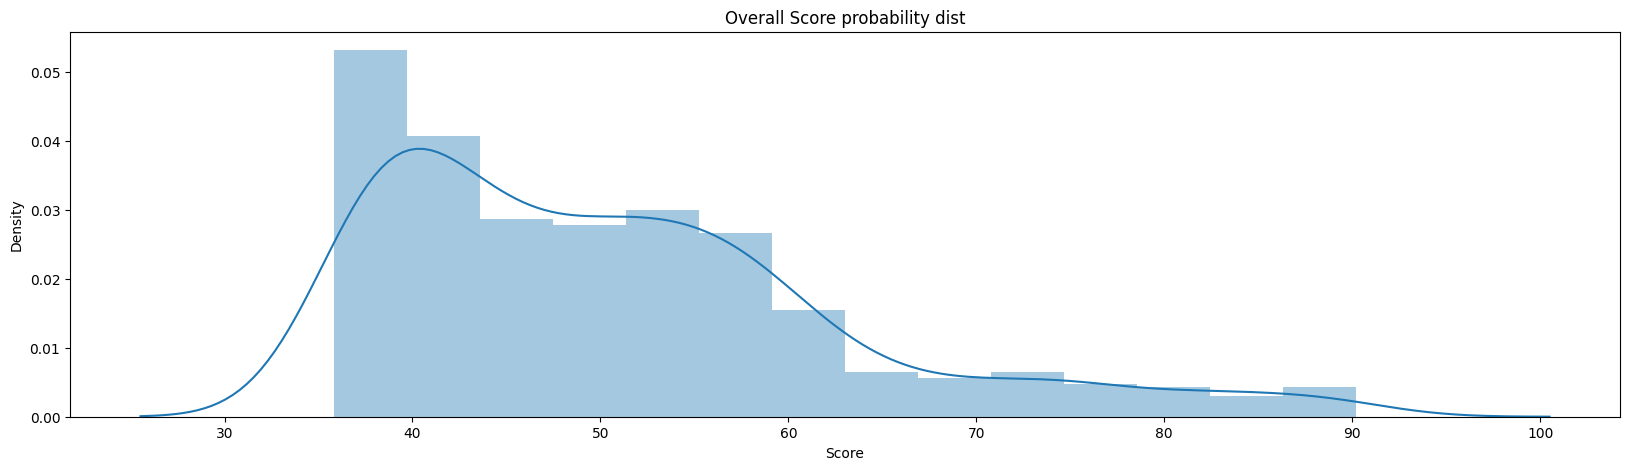

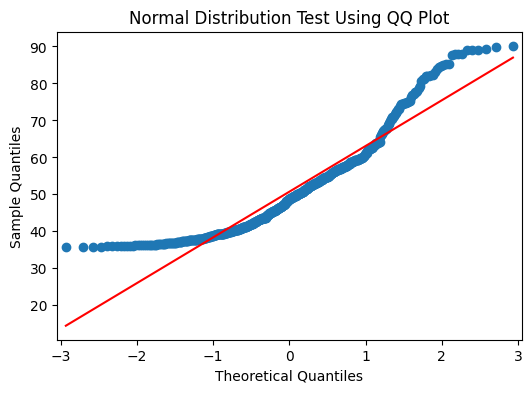

In [ ]:
import seaborn as sns

fig,a = plt.subplots(1,1,figsize=(20,5))

sns.distplot(df['Score'],hist=True,kde = True)
plt.title('Overall Score probability dist')
import statsmodels.api as sm

# Assuming 'df' is your DataFrame, and 'GO' is the column you want to create a QQ plot for
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(df['Score'], line='s', ax=ax)
ax.set_title('Normal Distribution Test Using QQ Plot')
plt.show()



In [ ]:
from scipy import stats

# Assuming 'df' is your DataFrame, and 'Score' is the column you want to test

stat, p = stats.normaltest(df['GO'])

if p > 0.05:
    print("Accept H0: The data follows a normal distribution.")
else:
    print("Reject H0: The data does not follow a normal distribution.")


Reject H0: The data does not follow a normal distribution.


'Overall Score'(Score) is also right skewed and p value is less then 0.05 which rejects the null hypothesis and its not normal

An observation which can be made from the right skewed of two columns -'Graduation Outcome' and 'OverAll Score' indicates that the measure for the colleges are mostly greater then 50% which why these colleges are in top 200 or 100 ranks for last 5 years

Covariance


In [ ]:
df_parameters = df[['TLR','RPC','GO','OI','Score','Perception']]

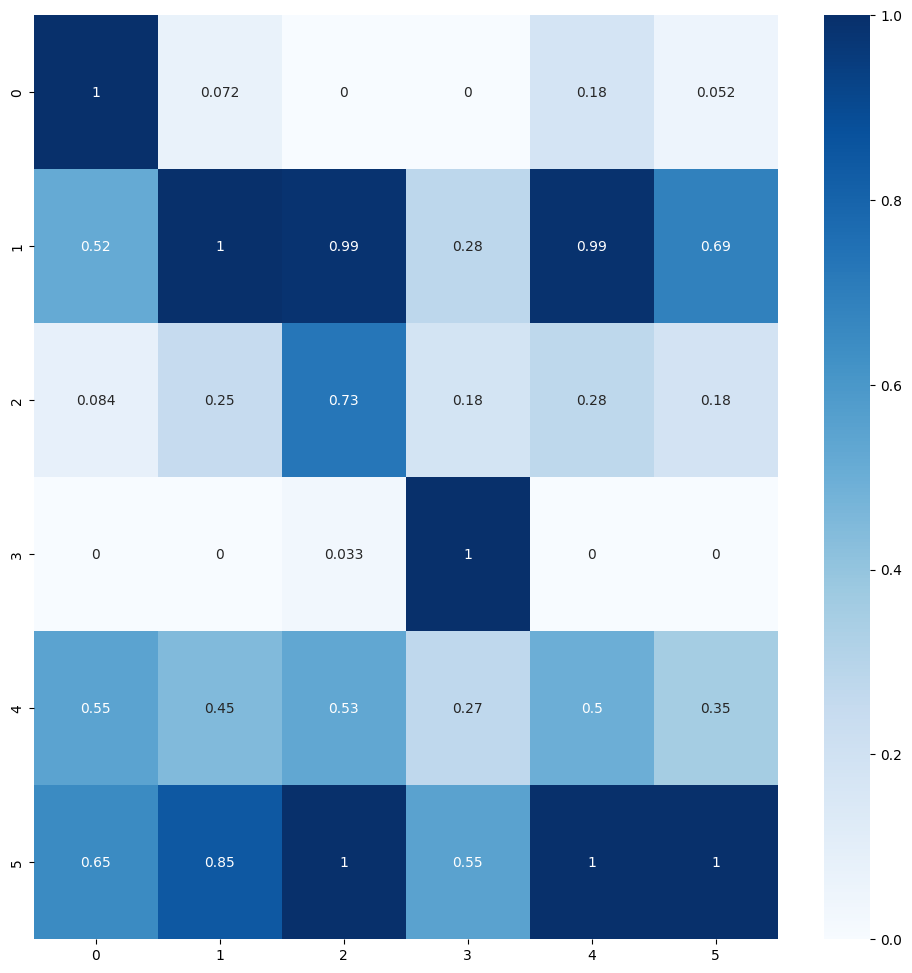

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # Import Min-Max Scaler from scikit-learn

covmat = df_parameters.cov()

# Use Min-Max scaling to normalize the covariance matrix
scaler = MinMaxScaler()
normalized_covmat = scaler.fit_transform(covmat)

plt.figure(figsize=(12, 12))
ax = sns.heatmap(normalized_covmat, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.show()



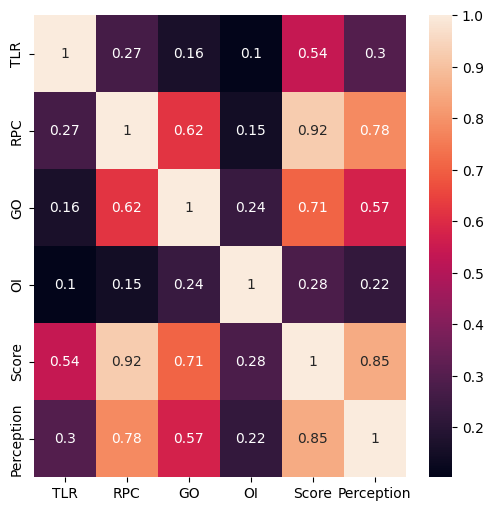

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cormat = df_parameters.corr()
# Assuming 'covmat' is your covariance matrix
plt.figure(figsize=(6, 6))  # Specify the desired figure size
ax = sns.heatmap(cormat, annot=True)
plt.show()

we see that rpc is highly correlated to the score so that means increase in rpc can highly effect the score


Regression Models

In [ ]:
# Multiple Linear Regression
# Model to estimate overall Score and a possible rank that a college secure
# given set of parameters

In [ ]:
inputDF = pd.DataFrame(np.c_[df['TLR'],df['RPC'],df['GO'],df['OI'],df['Perception']],columns=['TLR','RPC','GO','OI','Perception'])
y = df['Score'].values

import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputDF, df['Score'], test_size=0.20, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
LRM = LinearRegression()
modelLR = LRM.fit(X_train,y_train)
print('LinearRegression\n')
print('R2Score:',modelLR.score(X_test,y_test))

y_pred = modelLR.predict(X_test)
y_pred

LinearRegression

R2Score: 0.9992236349388803


array([48.06918096, 80.01312291, 63.92614967, 44.7263919 , 84.49854566,
       67.76998374, 58.90739177, 49.04128846, 54.10993388, 40.23170415,
       49.1707898 , 52.30058416, 89.05979589, 54.8251815 , 48.58640293,
       88.63308782, 43.37800498, 40.56026586, 46.49469843, 37.77846285,
       75.54530002, 63.72861011, 40.08196132, 41.80031692, 36.11436409,
       39.05851493, 54.04436158, 58.01598227, 52.94667531, 37.23516776,
       54.12224703, 62.69978042, 53.16887424, 44.12971138, 58.41401233,
       36.5323721 , 55.29479866, 40.03224121, 41.94934616, 46.64972367,
       48.77493751, 66.55089193, 57.1811531 , 49.49960714, 58.36698238,
       57.27791183, 43.06969526, 43.80003369, 57.75478694, 56.43319482,
       52.46096791, 40.31115395, 59.94304846, 46.68650367, 53.03277515,
       39.73909084, 50.0666181 , 47.82772212, 56.69800236, 36.81975083,
       37.66492772, 88.63207325, 51.38746767, 48.78159869, 36.01627407,
       39.9115967 , 70.04005329, 84.79235258, 45.50343861, 59.41

Sice Model Has very High R2 score so it may Overfit

In [ ]:
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_pred)))



Mean Absolute Error: 0.272308099356849
mean_squared_error: 0.13847701039230031
Root mean_squared_error: 0.37212499296916396


Here we Will use Lasso And Ridge to reduce the overfitting

In [ ]:
# Lasso or L1 regularization
from sklearn.linear_model import Ridge
model2 = Ridge().fit(X_train,y_train)
model2.score(X_test,y_test)

0.9992236621538788

In [ ]:
# Ridge or l2 Regularization
from sklearn.linear_model import Lasso
model3 = Lasso().fit(X_train,y_train)
model3.score(X_test,y_test)


0.9990965082137799

Since they are very near to without regularize model so there was no Overfitting

In [ ]:
df_temp_score_rank = df[['Score','Rank']]
df_Ranks_Scores = df_temp_score_rank.groupby('Rank').mean()

# Groupin

In [ ]:
import plotly.express as px

# Assuming df_Ranks_Scores is correctly defined
fig = px.line(df_Ranks_Scores, x=df_Ranks_Scores.index, y='Score')

# Set the y-axis label
fig.update_layout(yaxis_title='Score')

# Remove the legend
fig.update_layout(showlegend=False)

fig.show()


Decision Tree Regressor

In [ ]:
features = ['TLR','RPC','GO','OI','Perception']

In [ ]:
min_samples = [1,5,10,14,16]
from sklearn.tree import DecisionTreeRegressor
for i in min_samples:
  regressor = DecisionTreeRegressor(min_samples_leaf = i)
  regressor.fit(X_train,y_train)
  predicted_labels = regressor.predict(X_test)
  accuracyDT = regressor.score(X_test,y_test)
  print("/nAccuracy with min samples at leaf node =",i,"-",accuracyDT,'\n')

/nAccuracy with min samples at leaf node = 1 - 0.9663502094638609 

/nAccuracy with min samples at leaf node = 5 - 0.9610351208646227 

/nAccuracy with min samples at leaf node = 10 - 0.9468272612298222 

/nAccuracy with min samples at leaf node = 14 - 0.9305352173828902 

/nAccuracy with min samples at leaf node = 16 - 0.9306684822253752 



In [ ]:
regressorDT = DecisionTreeRegressor(min_samples_leaf=16)
regressorDT.fit(X_train,y_train)
accuracyDT = regressorDT.score(X_test,y_test)
print("Accuracy",accuracyDT)

Accuracy 0.9306684822253752


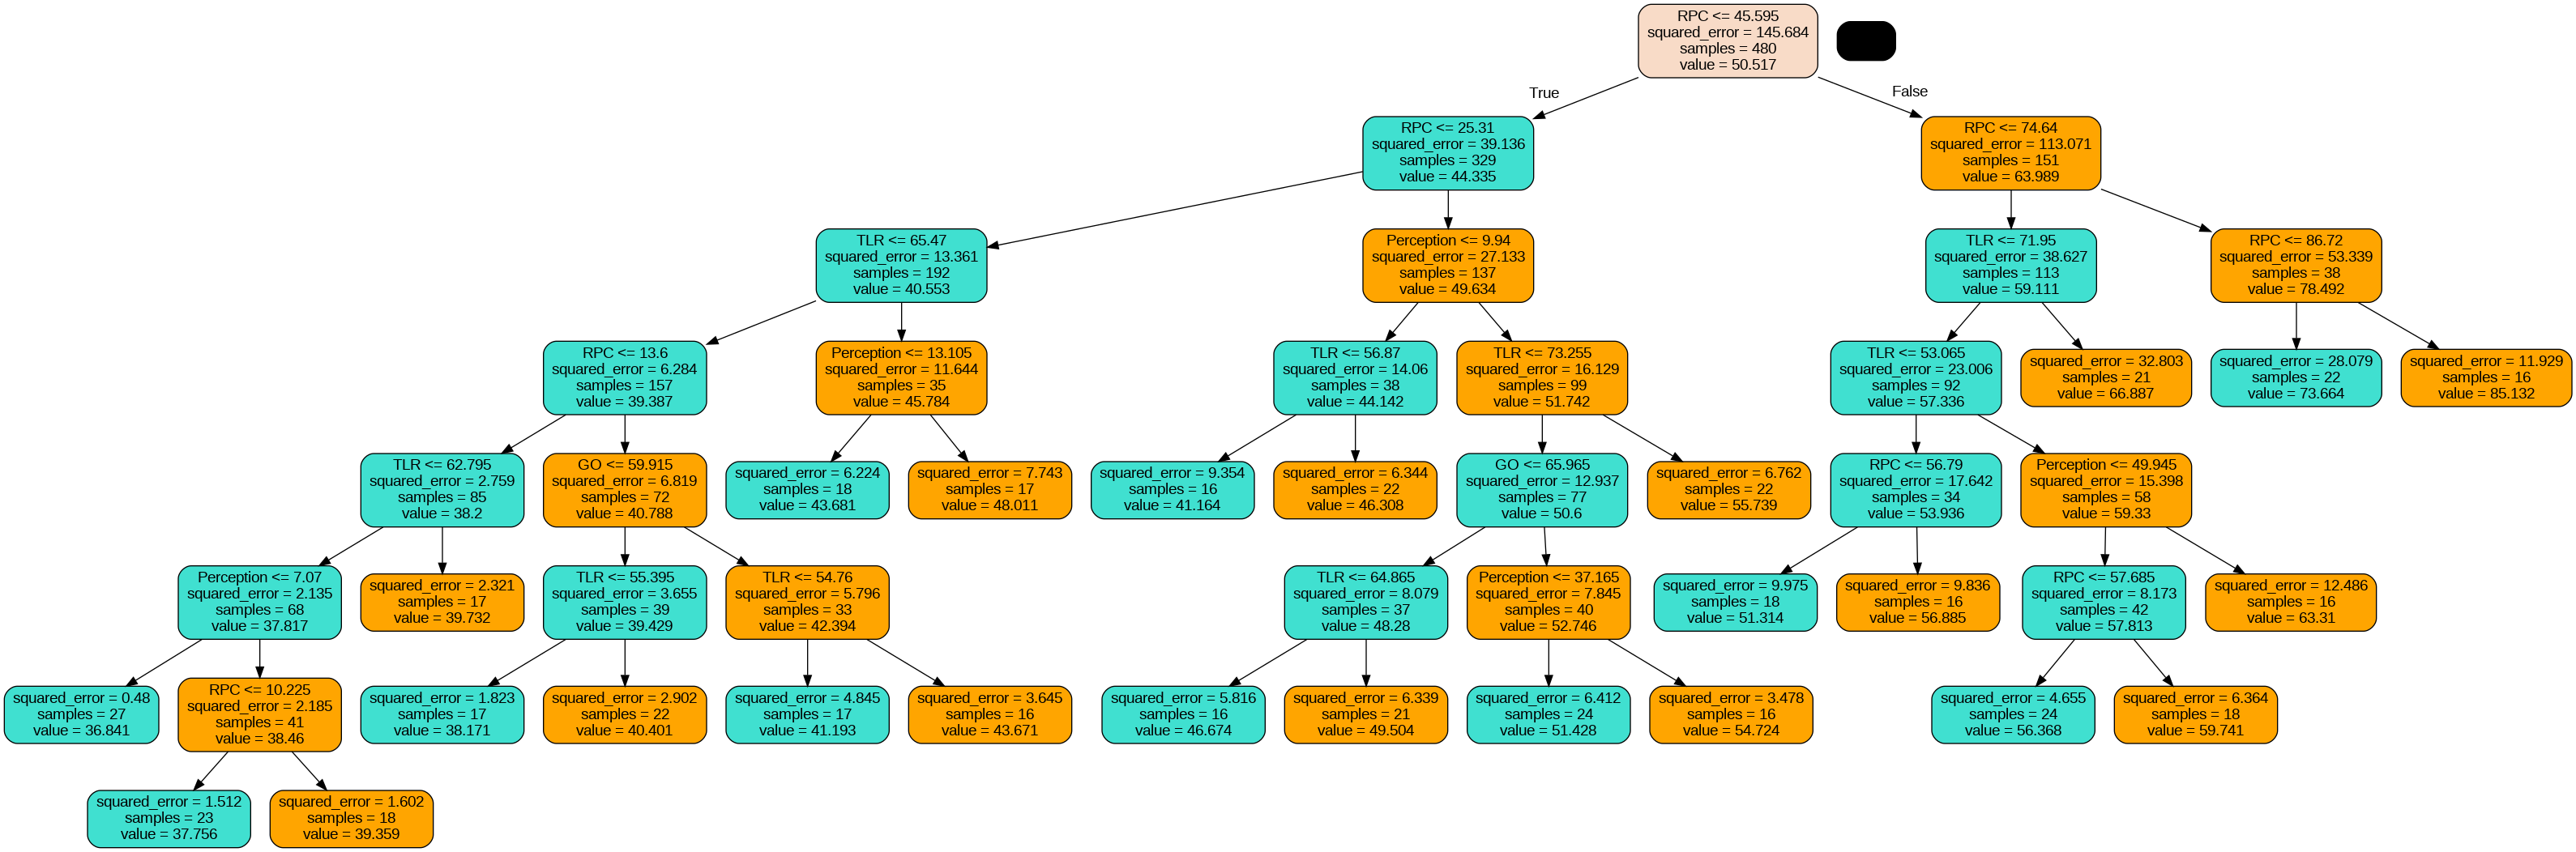

In [ ]:
# Make sure you have imported the necessary libraries for Decision Trees
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from sklearn import tree
import collections
import graphviz
from IPython.display import Image

# Create and train your Decision Tree model (regressorDT)
regressorDT = DecisionTreeRegressor(min_samples_leaf=16)
regressorDT.fit(X_train,y_train)  # X and y are your feature and target data

# Define the list of feature names (assuming you have a list called 'features')
features = ['TLR','RPC','GO','OI','Perception']
colors = ('turquoise','orange')
edges = collections.defaultdict(list)
# Export the decision tree in dot format
dotData = tree.export_graphviz(regressorDT, feature_names=features, filled=True, rounded=True)

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dotData)

# Generate a visualization of the decision tree and display it in your Jupyter Notebook
for e in graph.get_edge_list():
  edges[e.get_source()].append(int(e.get_destination()))

for e in edges:
  edges[e].sort()
  for i in range(2):
    dest = graph.get_node(str(edges[e][i]))[0]
    dest.set_fillcolor(colors[i])

graph.write_png('decisionTree.png')
Image(filename = 'decisionTree.png')

KNN Regressor
Elbow Method to determine k value

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


error_rate = []
for i in range(2,20):
  regressor = KNeighborsRegressor(n_neighbors=i)
  regressor.fit(X_train,y_train)
  predicted_labels = regressor.predict(X_test)
  expected_labels = list(y_test)
  error_rate.append((np.square(np.subtract(predicted_labels,expected_labels))).mean())

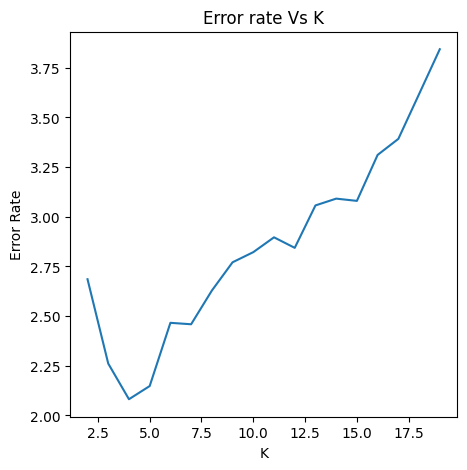

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

# Your code to create the lineplot
sns.lineplot(x=range(2, 20), y=error_rate)
plt.title('Error rate Vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
 # Specify the desired figure size

# Show the plot
plt.show()

# Save the plot as an EPS file
plt.savefig('error_vs_k.eps')

In [ ]:
regressorKNN = KNeighborsRegressor(n_neighbors=4)
regressorKNN.fit(X_train,y_train)
predicted_labels = regressorKNN.predict(X_test)
accuracyKNN = regressorKNN.score(X_test,y_test)

In [ ]:
print("Accuracy:",accuracyKNN)


Accuracy: 0.9883294367798257


Random Forest

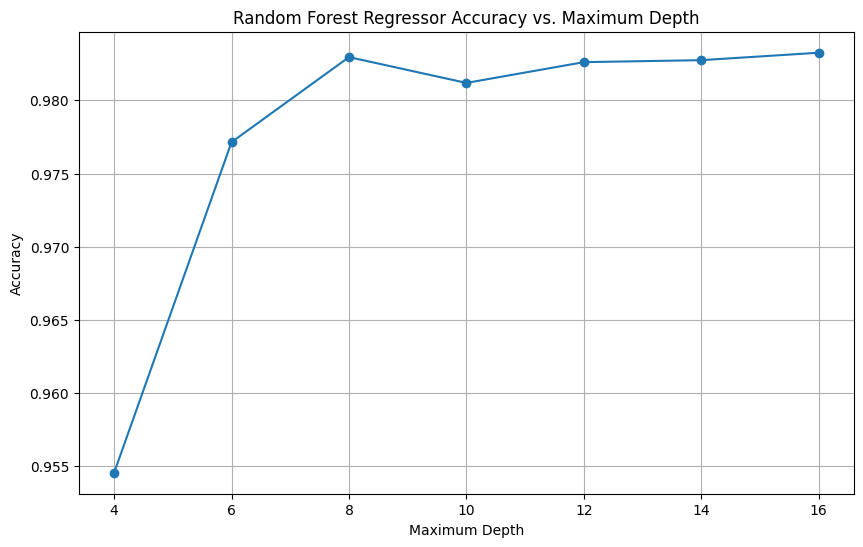

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Lists to store maximum depths and their corresponding accuracies
max_depths = []
accuracies = []

# Loop through different maximum depths
for i in range(4, 17, 2):
    regressorRF = RandomForestRegressor(max_depth=i)
    regressorRF.fit(X_train, y_train)
    accuracyRF = regressorRF.score(X_test, y_test)

    max_depths.append(i)
    accuracies.append(accuracyRF)

# Create a line plot to visualize accuracy vs. maximum depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Regressor Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
regressorRF = RandomForestRegressor(max_depth=16)
regressorRF.fit(X_train,y_train)
predicted_labels = regressorRF.predict(X_test)
accuracyRF = regressorRF.score(X_test,y_test)
print('Accuracy:',accuracyRF)

Accuracy: 0.9833016900481797


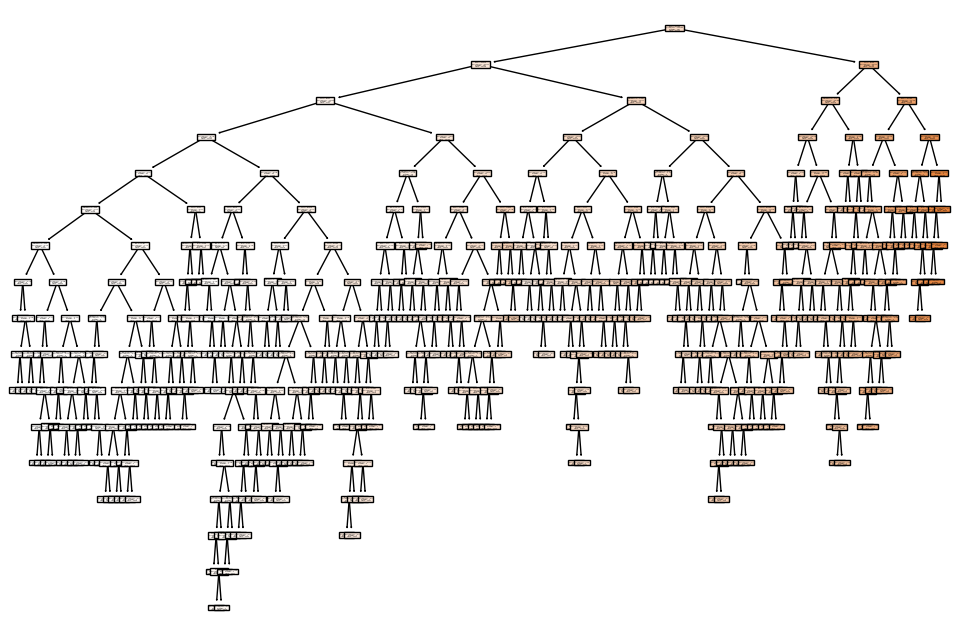

In [ ]:
from sklearn.tree import plot_tree

# Visualize the first tree in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(regressorRF.estimators_[0], filled=True, feature_names=features)
plt.show()


Comparision Of the Regression Models

Considering a new set of Parameters as the input to the above model,the overall score and the rank have beeen predicted

In [ ]:
test_parameters = [93.26,54.02,91.81,86.11,90]

In [ ]:
test_sample = np.array([93.26,54.02,91.81,86.11,90]).reshape(1,-1)
y_predict = regressorDT.predict(test_sample)
print('Predicted Score:',y_predict[0])
ranks_scores = df_Ranks_Scores.values
pos,value = min(enumerate(ranks_scores),key = lambda x:y_predict[0]<=x[1])
# to predict the rank by Interpolation
print('Predict rank:',pos+1)

Predicted Score: 66.88666666666666
Predict rank: 9


In [ ]:
test_sample = np.array([93.26,54.02,91.81,86.11,90]).reshape(1,-1)
y_predict = regressorKNN.predict(test_sample)
print('Predicted Score:',y_predict[0])
ranks_scores = df_Ranks_Scores.values
pos,value = min(enumerate(ranks_scores),key = lambda x:y_predict[0]<=x[1])
# to predict the rank by Interpolation
print('Predict rank:',pos+1)

Predicted Score: 74.1325
Predict rank: 7


In [ ]:
test_sample = np.array([93.26,54.02,91.81,86.11,90]).reshape(1,-1)
y_predict = regressorRF.predict(test_sample)
print('Predicted Score:',y_predict[0])
ranks_scores = df_Ranks_Scores.values
pos,value = min(enumerate(ranks_scores),key = lambda x:y_predict[0]<=x[1])
# to predict the rank by Interpolation
print('Predict rank:',pos+1)

Predicted Score: 68.3862
Predict rank: 8


In [ ]:
test_sample = np.array([93.26,54.02,91.81,86.11,90]).reshape(1,-1)
y_predict = modelLR.predict(test_sample)
print('Predicted Score:',y_predict[0])
ranks_scores = df_Ranks_Scores.values
pos,value = min(enumerate(ranks_scores),key = lambda x:y_predict[0]<=x[1])
print('Predict rank:',pos+1)

Predicted Score: 80.00783501508417
Predict rank: 5


Creation Of Model


In [ ]:
test_sample = np.array([93.26,54.02,91.81,86.11,90]).reshape(1,-1)
y_predict = modelLR.predict(test_sample)
# predicting the overall score for the given test parameter list using rank predictor
print('Predicted Score:',y_predict[0])

ranks_scores = df_Ranks_Scores.values
# extract rank and score from the dataFrame

pos,value = min(enumerate(ranks_scores),key = lambda x:y_predict[0]<=x[1])
# to predict the rank by Interpolation
print('Predict rank:',pos+1)

Predicted Score: 80.00783501508417
Predict rank: 5


In [ ]:
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(modelLR, file)
import pickle

# Load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


To predict the Parameter values Inorder to attain a particular rank

In [ ]:
df_parameters = df[['TLR','RPC','GO','OI','Score','Perception']]

In [ ]:
df_parameters.head()

,TLR,RPC,GO,OI,Score,Perception
0,88.26,94.02,81.81,86.11,89.41,98.0
1,85.93,94.14,84.97,74.84,87.66,99.0
2,76.23,92.68,83.95,78.05,83.91,97.0
3,80.27,91.62,74.72,66.17,82.02,98.0
4,66.08,93.52,85.62,70.59,81.07,98.0


In [ ]:
from sklearn.cluster import KMeans
# creating 101 clusters equivalent to 101 ranks
kmeans_model = KMeans(n_clusters=200)
df_parameters['clusters'] = kmeans_model.fit_predict(df_parameters)

In [ ]:
df_parameters.head()

,TLR,RPC,GO,OI,Score,Perception,clusters
0,88.26,94.02,81.81,86.11,89.41,98.0,10
1,85.93,94.14,84.97,74.84,87.66,99.0,10
2,76.23,92.68,83.95,78.05,83.91,97.0,10
3,80.27,91.62,74.72,66.17,82.02,98.0,173
4,66.08,93.52,85.62,70.59,81.07,98.0,180


In [ ]:
centers = kmeans_model.cluster_centers_

In [ ]:
centers

array([[73.435     , 86.23      , 84.885     , 55.89      , 78.595     ,
        81.325     ],
       [64.67      , 36.37375   , 61.86375   , 53.335     , 49.82375   ,
        18.06      ],
       [54.04666667, 31.24833333, 54.26333333, 59.55833333, 43.445     ,
        10.48666667],
       ...,
       [60.21      , 65.55      , 81.        , 58.4       , 63.77      ,
        51.        ],
       [60.78      , 75.69      , 81.49      , 73.21      , 70.8       ,
        74.        ],
       [50.02      , 48.05      , 75.83      , 75.45      , 54.02      ,
        23.        ]])

In [ ]:
df_centers = pd.DataFrame(centers,columns =['TLR','RPC','GO','OI','Score','Perception'])

In [ ]:
df_centers.sort_values(by=['Score'],ascending=False)


,TLR,RPC,GO,OI,Score,Perception
61,93.470000,94.478333,82.736667,63.803333,89.193333,98.848333
100,91.500000,93.640000,83.710000,73.445000,87.915000,82.850000
10,83.473333,93.613333,83.576667,79.666667,86.993333,98.000000
19,88.970000,94.690000,78.126000,50.548000,84.964000,91.866000
83,86.465000,82.605000,89.115000,55.085000,82.700000,86.415000
...,...,...,...,...,...,...
86,61.458000,5.890000,48.698000,62.806000,36.622000,3.968000
28,64.493333,13.326667,47.320000,35.856667,36.533333,1.410000
181,54.320000,3.962500,62.870000,57.162500,36.480000,7.017500
108,51.595000,8.380000,51.070000,53.895000,36.385000,27.900000


In [ ]:
df_Ranks_Scores

,Score
Rank,
1,89.248333
2,87.125000
3,83.776667
4,80.948333
5,78.883333
...,...
96,39.259000
97,39.181833
98,39.098333


In [ ]:
test_rank = 9
# rank for which the overall score and parameter values need to be estimated
estimated_score = df_Ranks_Scores.iloc[test_rank-1]
print('Estimated Score:',estimated_score[0])


Estimated Score: 65.27333333333333


In [ ]:
# Calculate the absolute differences between 'Score' and 'estimated_score'
absolute_differences = (df_centers['Score'] - estimated_score[0]).abs()

# Sort the DataFrame by the absolute differences and get the indices
sorted_indices = absolute_differences.argsort()

# Select the row with the smallest absolute difference
closest_row = df_centers.iloc[sorted_indices[0]]

# estimated_parameter_values now contains the closest row
estimated_parameter_values = closest_row
estimated_parameter_values

TLR           80.710
RPC           50.825
GO            71.625
OI            56.095
Score         65.180
Perception    57.900
Name: 7, dtype: float64

In [ ]:
estimated_parameter_values

TLR           80.710
RPC           50.825
GO            71.625
OI            56.095
Score         65.180
Perception    57.900
Name: 7, dtype: float64

The above are the estimated parameter values that need to be attained in order to secure the desired rank (10)

In [ ]:
# Save the K-Means model to a file
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans_model, model_file)

# Save the estimated parameter values to a file
with open('estimated_parameter_values.pkl', 'wb') as values_file:
    pickle.dump(estimated_parameter_values, values_file)
